In [47]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import statsmodels.api as sm
from scipy import stats

In [ ]:
import tensorflow

# Green spaces dataset CABA
https://data.buenosaires.gob.ar/dataset/arbolado-espacios-verdes/resource/juqdkmgo-71-resource

In [2]:
# loading dataset
df = pd.read_csv('../files/arbolado.csv', encoding='utf8')

In [3]:
df.head(2)

,long,lat,id_arbol,altura_tot,diametro,inclinacio,id_especie,nombre_com,nombre_cie,tipo_folla,espacio_ve,ubicacion,nombre_fam,nombre_gen,origen,coord_x,coord_y
0,-58.477564,-34.645015,1,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.305719,98253.300738
1,-58.477559,-34.645047,2,6,35,0,53,Washingtonia (Palmera washingtonia),Washingtonia filifera,Palmera,"AVELLANEDA, NICOLÁS, Pres.","DIRECTORIO, AV. - LACARRA, AV. - MONTE - AUTO...",Arecaceas,Washingtonia,Exótico,98692.751564,98249.733979


In [6]:
print(f'The dataset has {df.shape[0]} rowas and {df.shape[1]} columns')

The dataset has 51502 rowas and 17 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51502 entries, 0 to 51501
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   long        51502 non-null  float64
 1   lat         51502 non-null  float64
 2   id_arbol    51502 non-null  int64  
 3   altura_tot  51502 non-null  int64  
 4   diametro    51502 non-null  int64  
 5   inclinacio  51502 non-null  int64  
 6   id_especie  51502 non-null  int64  
 7   nombre_com  51502 non-null  object 
 8   nombre_cie  51502 non-null  object 
 9   tipo_folla  51502 non-null  object 
 10  espacio_ve  51502 non-null  object 
 11  ubicacion   50529 non-null  object 
 12  nombre_fam  51502 non-null  object 
 13  nombre_gen  51502 non-null  object 
 14  origen      51502 non-null  object 
 15  coord_x     51502 non-null  float64
 16  coord_y     51502 non-null  float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.7+ MB


In [7]:
dff = df[['espacio_ve', 'nombre_cie', 'origen', 'altura_tot', 'diametro', 'inclinacio']]
dff.head(3)

,espacio_ve,nombre_cie,origen,altura_tot,diametro,inclinacio
0,"AVELLANEDA, NICOLÁS, Pres.",Washingtonia filifera,Exótico,6,35,0
1,"AVELLANEDA, NICOLÁS, Pres.",Washingtonia filifera,Exótico,6,35,0
2,"AVELLANEDA, NICOLÁS, Pres.",Washingtonia filifera,Exótico,6,35,0


# Green spaces analysis

In [8]:
print(f"There are {dff['espacio_ve'].nunique()} green spaces in CAB")

There are 583 green spaces in CAB


In [9]:
# top 10 trees/green spaces
n_ejemplares_parque10 = dff.groupby('espacio_ve', as_index=False).agg({'nombre_cie': 'count'}).sort_values('nombre_cie',ascending=False).head(10)
n_ejemplares_parque10

,espacio_ve,nombre_cie
493,S/D,5815
255,INDOAMERICANO,3099
148,DE LOS NIÑOS (EX - TRIANGULO DEL ESTE) (Denomi...,1999
54,"BASTIDAS, MICAELA",1400
345,MUJERES ARGENTINAS,1198
142,DE LAS VICTORIAS,1118
44,"AVELLANEDA, NICOLÁS, Pres.",1109
192,EL ROSEDAL (Sector dentro de Plaza HOLANDA),922
52,BARRIO GENERAL SAN MARTIN,864
98,CHACABUCO,827


In [10]:
# TREES CONCENTRATION
cc = round(n_ejemplares_parque10["nombre_cie"].sum()/df.shape[0]*100, 2)
print(f'The 10 parks with the most specimens concentrate {cc} of the total number of specimens.')

The 10 parks with the most specimens concentrate 35.63 of the total number of specimens.


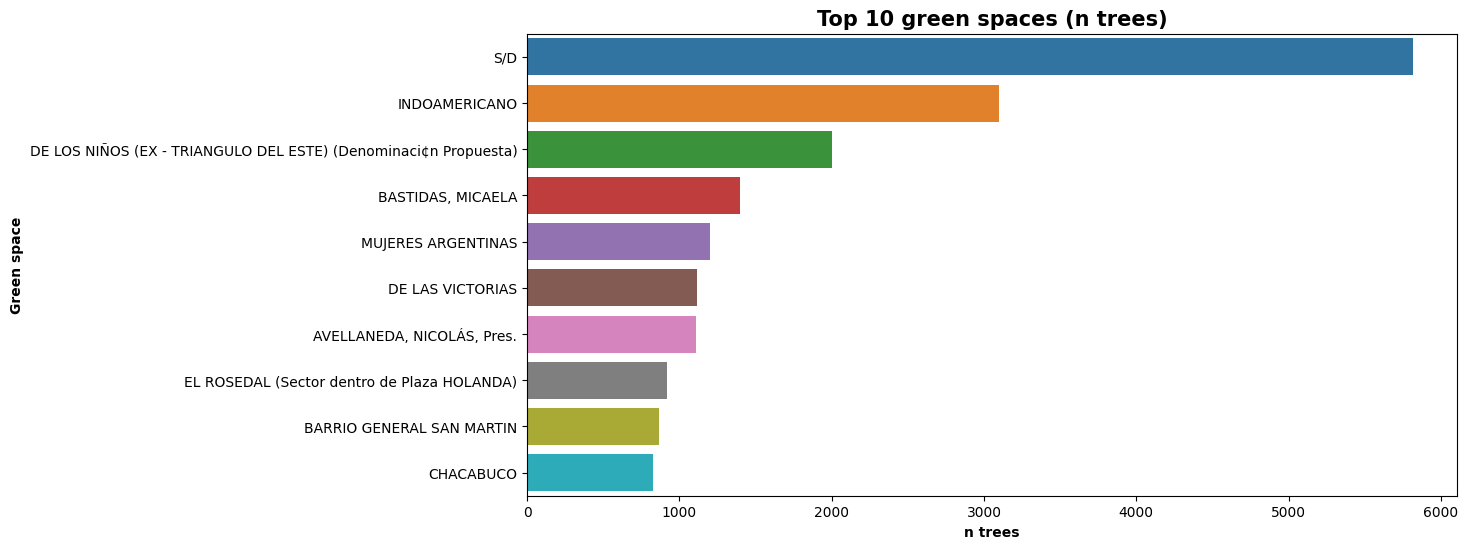

In [12]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.barplot(data= n_ejemplares_parque10, x='nombre_cie', y='espacio_ve')
ax.set_title('Top 10 green spaces (n trees)',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('n trees', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('Green space', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

### 'S/D' analysis

In [13]:
# std latitude and longitude S/D
df.loc[df['espacio_ve'] == 'S/D', ['lat', 'long']].agg({'lat': 'std', 'long': 'std'})

lat     0.040487
long    0.033878
dtype: float64

In [14]:
# std latitude and longitude in whole dataset
df.agg({'lat': 'std', 'long': 'std'})

lat     0.042900
long    0.044614
dtype: float64

In [15]:
sample = 5
random.seed(1)
randomParks = random.choices(df['espacio_ve'].unique(), k=sample)
randomParks

['CAÑADA, GASPAR, Padre',
 'SKANDERBERG(JORGE CASTRIOTA)',
 'FROEBEL, FEDERICO',
 'DE LA POLICIA FEDERAL',
 'PASEO ASTOR PIAZZZOLLA']

In [17]:
for x in randomParks:
    lat, long = df.loc[df['espacio_ve'] == x, :].agg({'lat': 'std', 'long': 'std'})
    print(f"""green space: {x}
    - std latitude: {round(lat, 5)}
    - std longitude: {round(long, 5)}""", end='\n'*2)

green space: CAÑADA, GASPAR, Padre
    - std latitude: 0.00055
    - std longitude: 0.00066

green space: SKANDERBERG(JORGE CASTRIOTA)
    - std latitude: 0.00013
    - std longitude: 0.00018

green space: FROEBEL, FEDERICO
    - std latitude: 7e-05
    - std longitude: 0.00015

green space: DE LA POLICIA FEDERAL
    - std latitude: 3e-05
    - std longitude: 5e-05

green space: PASEO ASTOR PIAZZZOLLA
    - std latitude: 0.00012
    - std longitude: 0.00023



In [18]:
lat = 0
long = 0
for x in randomParks:
    latx, longx = df.loc[df['espacio_ve'] == x, ['lat', 'long']].agg({'lat': 'std', 'long': 'std'})
    lat += latx
    long += longx
print(f'Mean std latitude: {round(lat/sample, 5)}\nMean std longitude: {round(long/sample, 5)}')

Mean std latitude: 0.00018
Mean std longitude: 0.00025


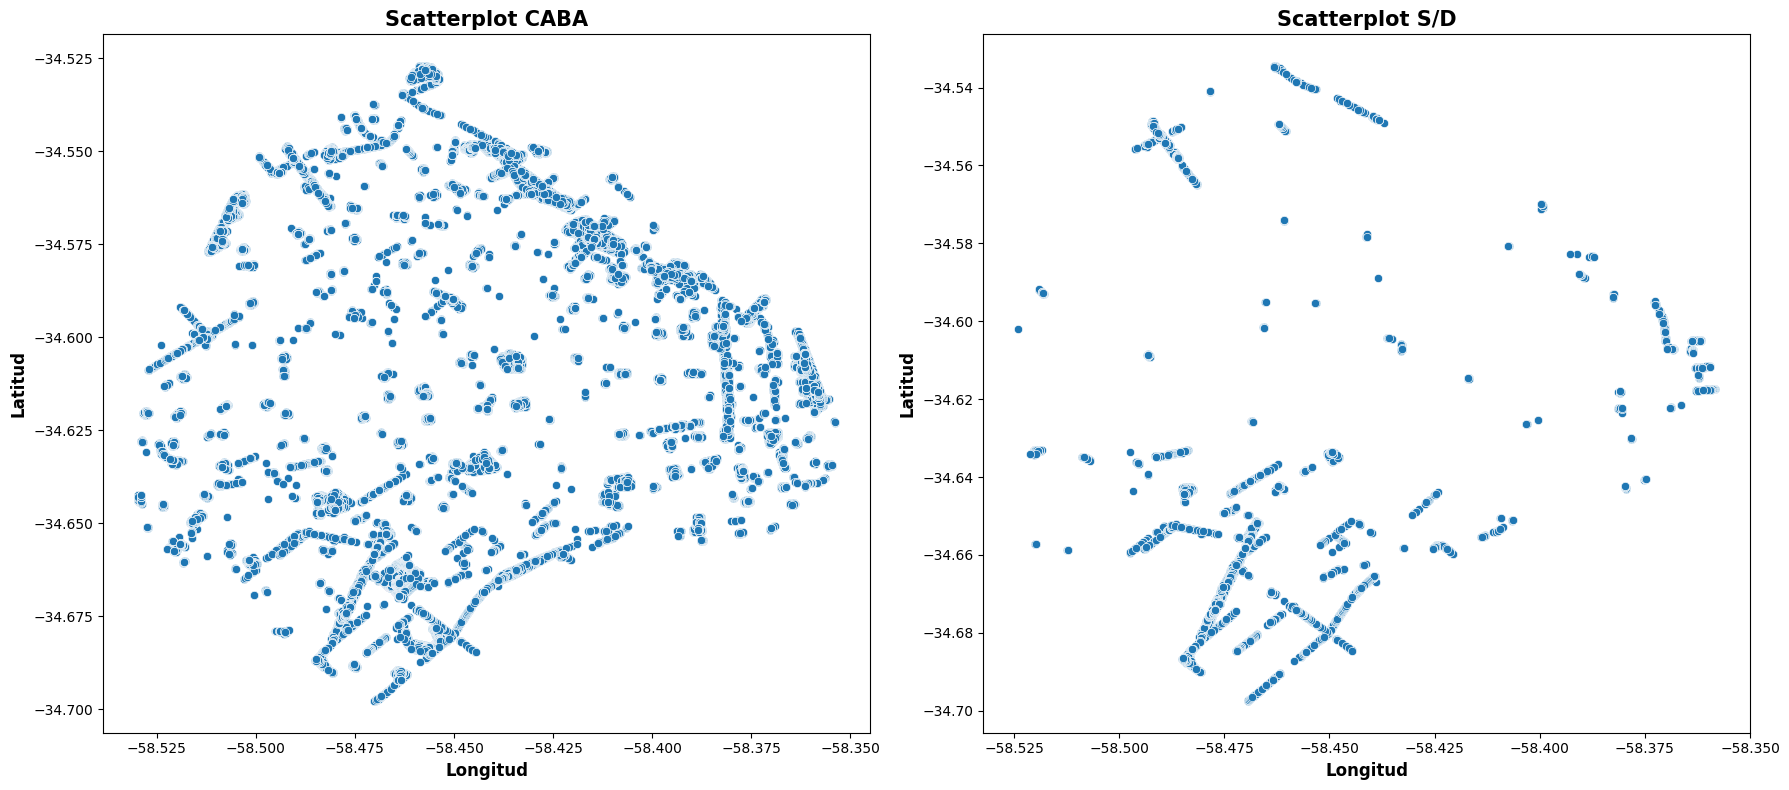

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
sns.scatterplot(ax=ax[0],
                data=df,
                x='long',
                y='lat')
ax[0].set_xlabel('Longitud', fontdict={'fontsize': 12,'fontweight':'bold'})
ax[0].set_ylabel('Latitud', fontdict={'fontsize': 12,'fontweight':'bold'})
ax[0].set_title('Scatterplot CABA',fontdict={'fontsize': 15,'fontweight':'bold'})

sns.scatterplot(ax=ax[1],
                x=df.loc[df['espacio_ve'] == 'S/D', 'long'],
                y=df.loc[df['espacio_ve'] == 'S/D', 'lat'])
ax[1].set_xlabel('Longitud', fontdict={'fontsize': 12,'fontweight':'bold'})
ax[1].set_ylabel('Latitud', fontdict={'fontsize': 12,'fontweight':'bold'})
ax[1].set_title('Scatterplot S/D',fontdict={'fontsize': 15,'fontweight':'bold'})

plt.tight_layout()
plt.show()

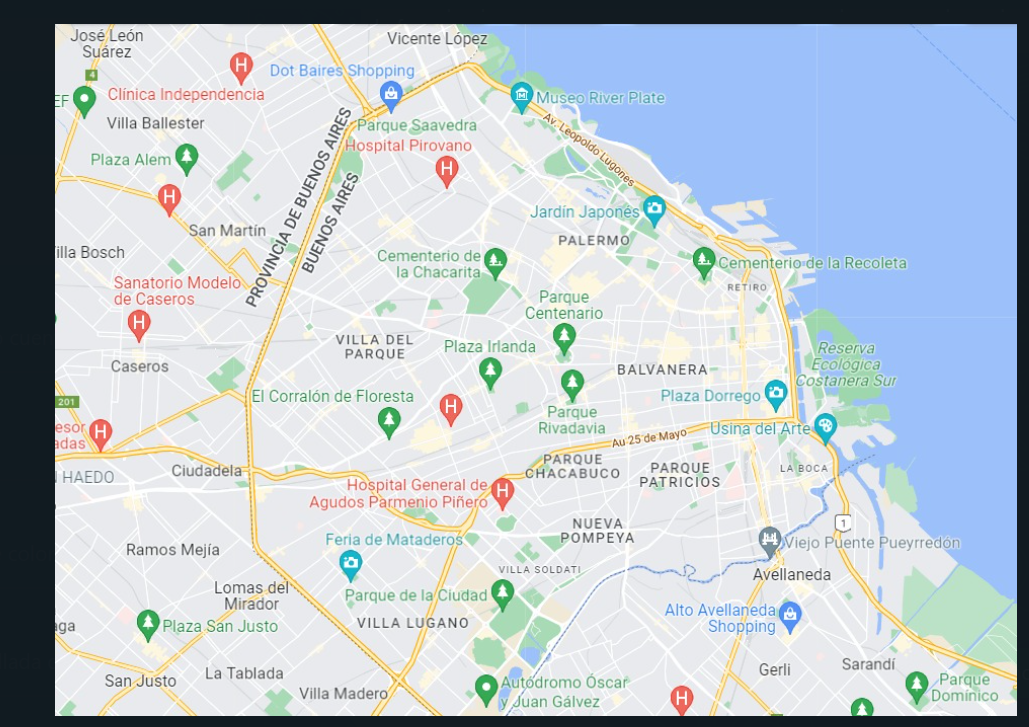

In [20]:
Image('20220926_practico1.png', width=600, height=400)


green space sd possibly refers to avenues

# origin analysis

In [21]:
dff['origen'].unique()

array(['Exótico', 'Nativo/Autóctono', 'No Determinado'], dtype=object)

In [23]:
origin = round(dff['origen'].value_counts()/dff.shape[0]*100, 1)
origin

Exótico             63.4
Nativo/Autóctono    33.1
No Determinado       3.5
Name: origen, dtype: float64

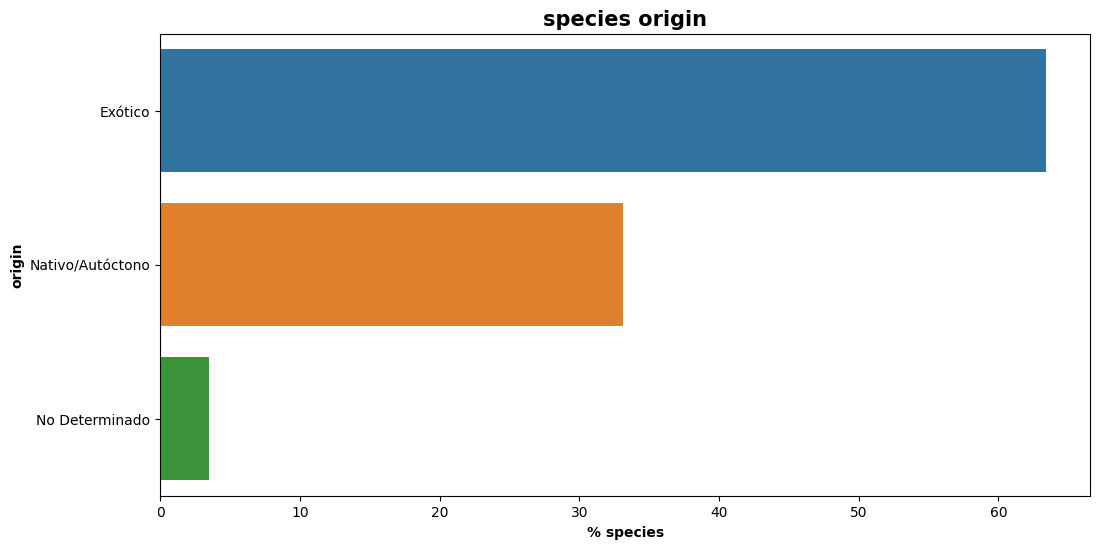

In [25]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.barplot(x=origin.values, y=origin.index)
ax.set_title('species origin',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('% species', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('origin', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

# tree analysis

In [27]:
n_species = dff['nombre_cie'].nunique()
print(f'In CABA there are a total of {n_species} different species')

In CABA there are a total of 358 different species


In [28]:
trees = dff['nombre_cie'].value_counts().head(10)
trees

Eucalyptus sp.              4054
Tipuana Tipu                4031
Jacarandá mimosifolia       3255
Ceiba speciosa              3150
Casuarina cunninghamiana    2719
Fraxinus pennsylvanica      2166
Platanus x acerifolia       1556
Erythrina crista-galli      1118
Syagrus romanzoffiana       1068
Ficus benjamina             1027
Name: nombre_cie, dtype: int64

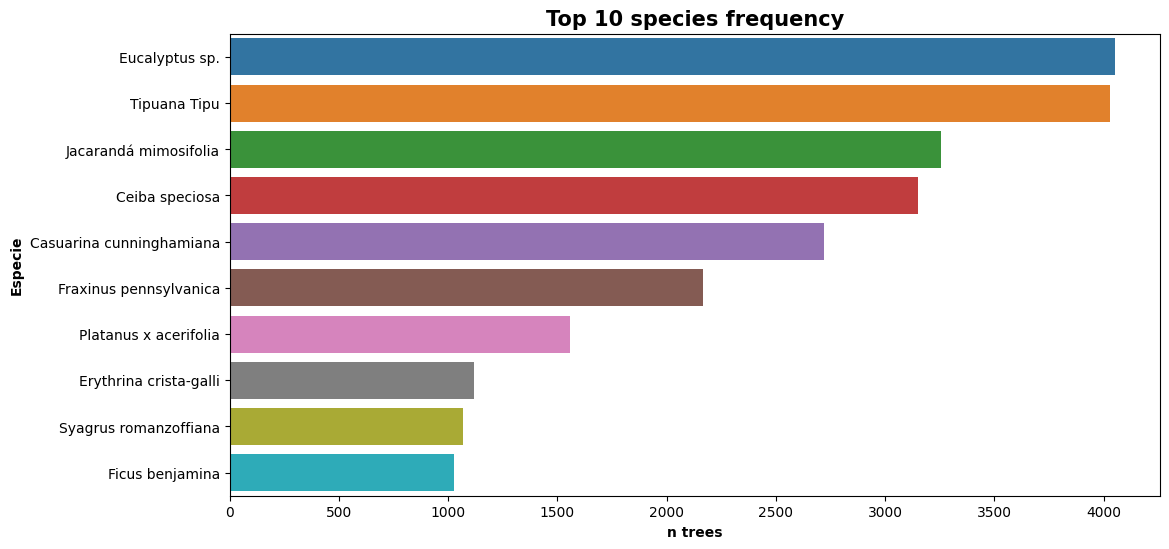

In [30]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.barplot(x=trees.values, y=trees.index)
ax.set_title('Top 10 species frequency',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('n trees', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('Especie', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

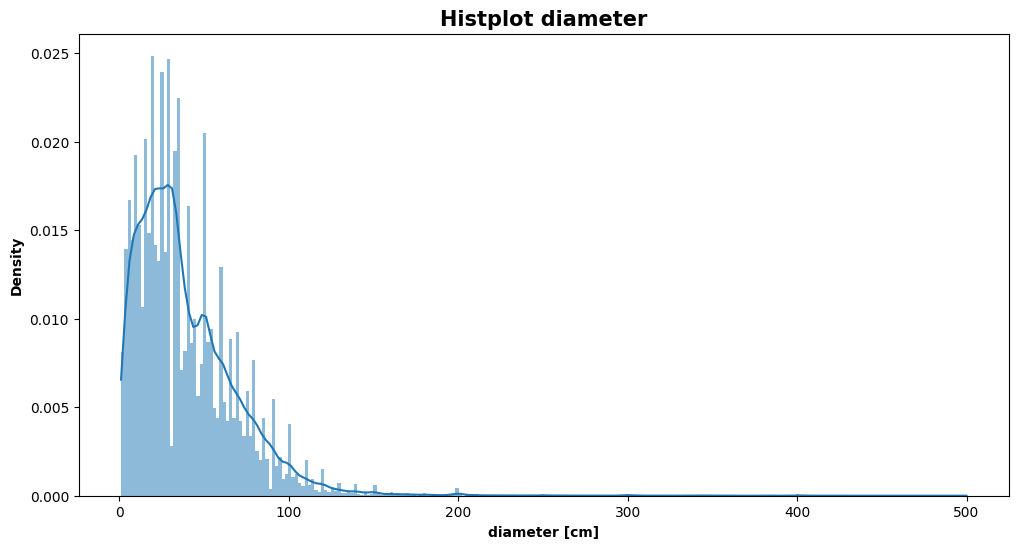

In [32]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.histplot(x=dff['diametro'], kde=True, stat="density", linewidth=0)
ax.set_title('Histplot diameter',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('diameter [cm]', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('Density', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

In [33]:
(dff['diametro']<=0).sum()

0

In [35]:
mean_diameter = dff['diametro'].mean()
std_diameter = dff['diametro'].std()
print(f"CV: {round(std_diameter/mean_diameter*100, 2)}")
print(f"Percentil 99: {dff['diametro'].quantile(q=0.99)}")

CV: 79.12
Percentil 99: 135.0


In [36]:
mean3 = mean_diameter + std_diameter*3
round(mean3, 2)

132.91

In [37]:
df.loc[df['diametro'] > mean3, 'diametro'].count()

530

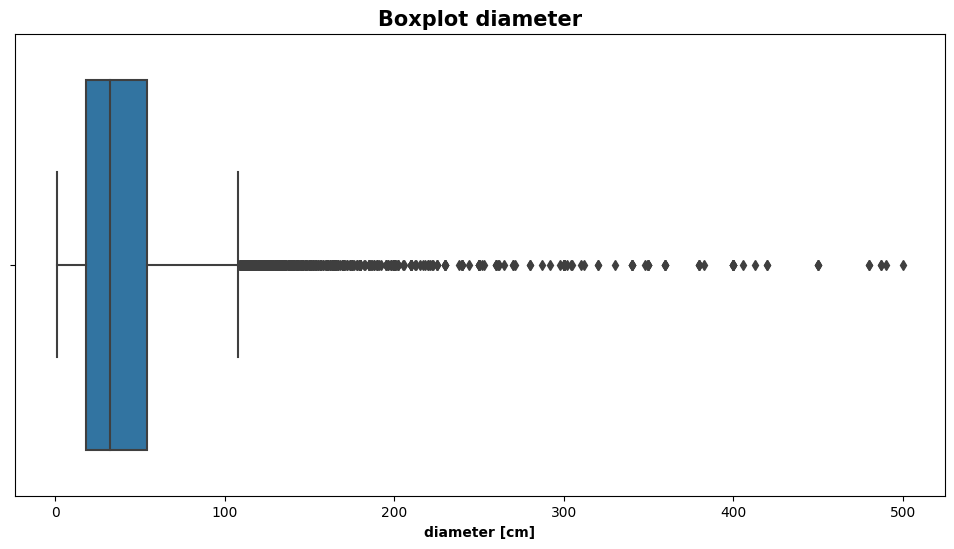

In [39]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.boxplot(x=dff['diametro'])
ax.set_title('Boxplot diameter',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('diameter [cm]', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

In [53]:
q1 = dff['diametro'].quantile(q=0.25)
q3 = dff['diametro'].quantile(q=0.75)
iqr = q3 - q1
maximo = q3 + 1.5*iqr
filtred_diameter = dff.loc[(dff['diametro'] < maximo) & (dff['diametro'] > minimo), 'diametro']

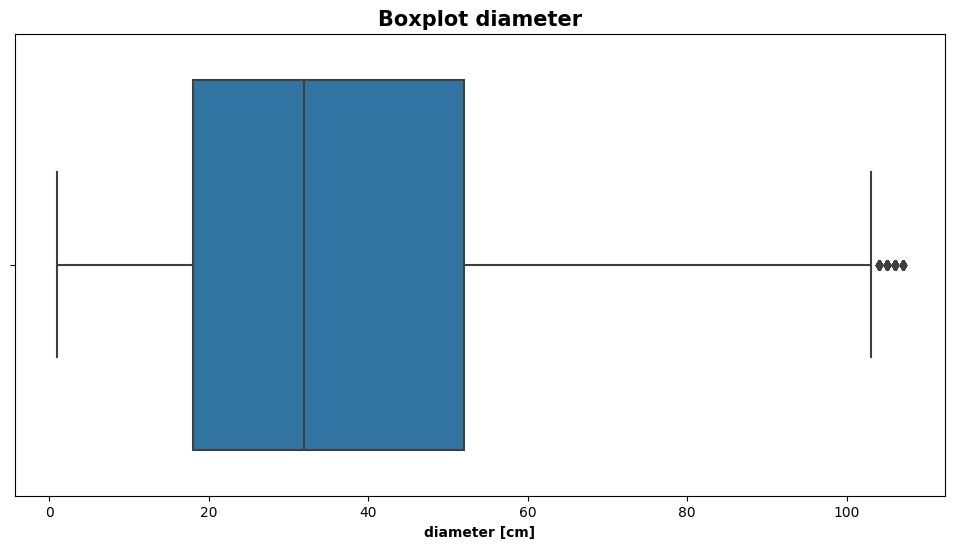

In [54]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.boxplot(x=filtred_diameter)
ax.set_title('Boxplot diameter',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('diameter [cm]', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

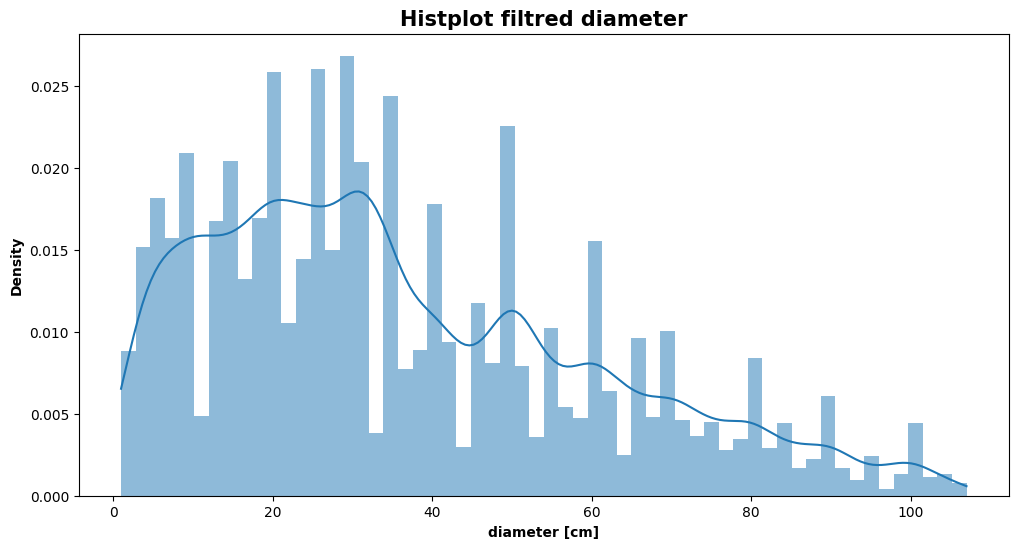

In [55]:
fig = plt.figure(figsize=(12, 6))
ax = plt.axes()
ax = sns.histplot(x=filtred_diameter, kde=True, stat="density", linewidth=0)
ax.set_title('Histplot filtred diameter',fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('diameter [cm]', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('Density', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()

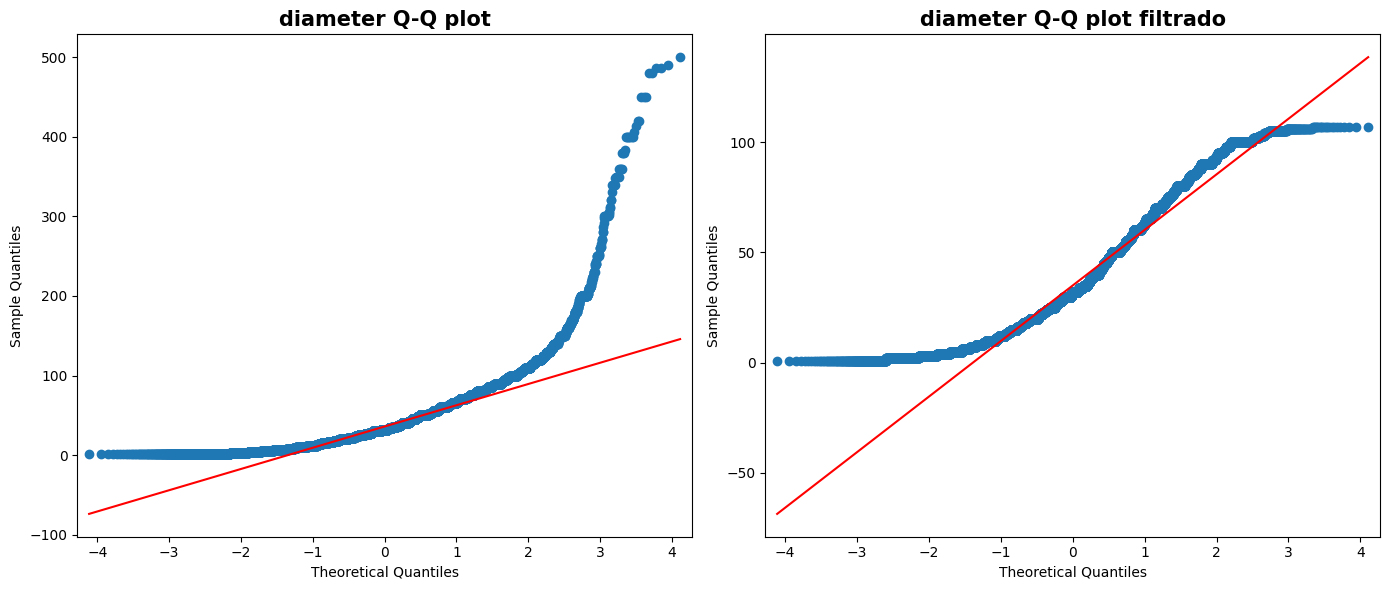

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sm.qqplot(dff['diametro'],
          line='q',
          lw=2,
          ax=ax[0])
ax[0].set_title('diameter Q-Q plot',fontdict={'fontsize': 15,'fontweight':'bold'})

sm.qqplot(filtred_diameter,
          line='q',
          lw=2,
          ax=ax[1])
ax[1].set_title('diameter Q-Q plot filtrado',fontdict={'fontsize': 15,'fontweight':'bold'})
plt.tight_layout()
plt.show()

In [57]:
sw = stats.shapiro(dff['diametro'])
print(f'SW diameter: {round(sw[0], 3)}')

swf = stats.shapiro(filtred_diameter)
print(f'SW diameter filtrado: {round(swf[0], 3)}')

SW diameter: 0.833
SW diameter filtrado: 0.943


c:\Users\fer\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C:\Users\fer\AppData\Local\Temp\ipykernel_16256\2226659256.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(dff.corr(method='pearson'), cmap="YlGnBu", annot=True)


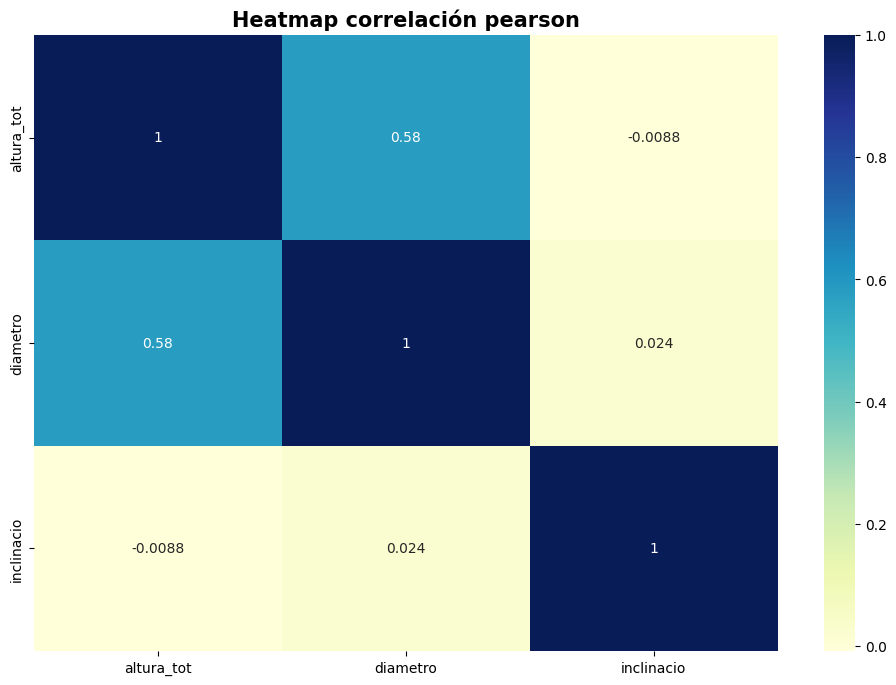

In [58]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax = sns.heatmap(dff.corr(method='pearson'), cmap="YlGnBu", annot=True)
ax.set_title('Heatmap correlación pearson',fontdict={'fontsize': 15,'fontweight':'bold'})
plt.show()

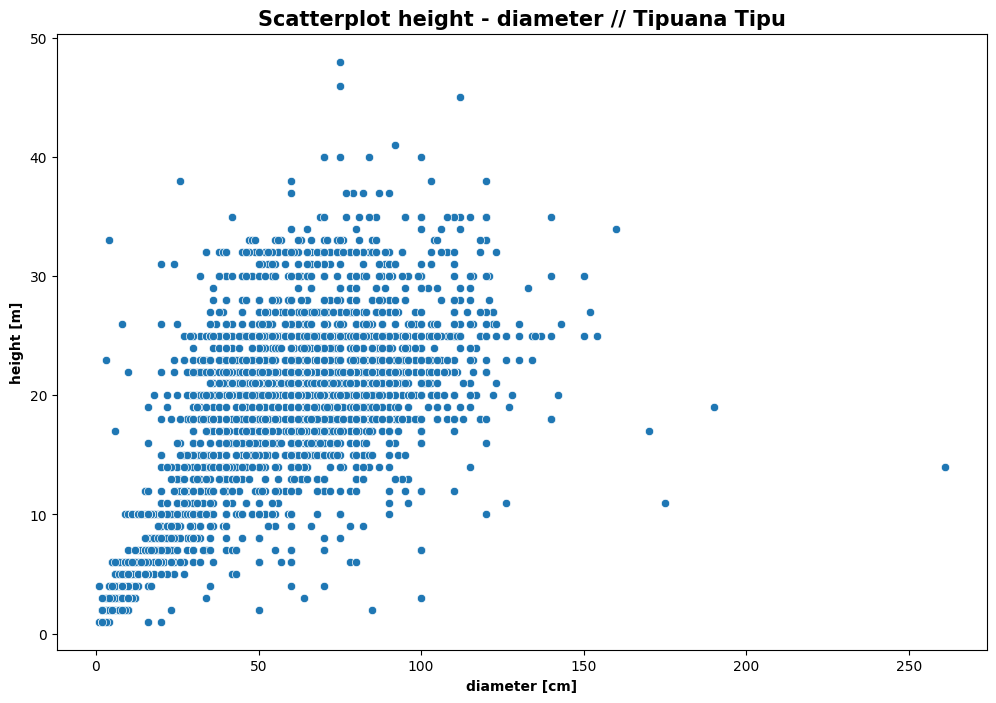

In [61]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax = sns.scatterplot(x=dff.loc[dff['nombre_cie'] == 'Tipuana Tipu', 'diametro'], 
                     y=dff.loc[dff['nombre_cie'] == 'Tipuana Tipu', 'altura_tot'])
ax.set_title('Scatterplot height - diameter // Tipuana Tipu' ,fontdict={'fontsize': 15,'fontweight':'bold'})
ax.set_xlabel('diameter [cm]', fontdict={'fontsize': 10,'fontweight':'bold'})
ax.set_ylabel('height [m]', fontdict={'fontsize': 10,'fontweight':'bold'})
plt.show()